开始SO2数据集对比分析...
加载数据集...
  ✓ 成功加载 SO2_v=1: 8000 行, 21 列
  ✓ 成功加载 SO2_v=10: 801 行, 21 列
  ✓ 成功加载 SO2_v=20: 401 行, 21 列

数据集基本信息对比

SO2_v=1:
  数据形状: (8000, 21)
  列名: ['wavenumber', 't=100k', 't=200k', 't=300k', 't=400k', 't=500k', 't=600k', 't=700k', 't=800k', 't=900k', 't=1000k', 't=1100k', 't=1200k', 't=1300k', 't=1400k', 't=1500k', 't=1600k', 't=1700k', 't=1800k', 't=1900k', 't=2000k']
  温度范围: 100K - 2000K
  温度点数: 20
  数值范围: 6.83e-33 - 1.83e-18
  平均值: 5.01e-21
  标准差: 3.54e-20

SO2_v=10:
  数据形状: (801, 21)
  列名: ['wavenumber', 't=100k', 't=200k', 't=300k', 't=400k', 't=500k', 't=600k', 't=700k', 't=800k', 't=900k', 't=1000k', 't=1100k', 't=1200k', 't=1300k', 't=1400k', 't=1500k', 't=1600k', 't=1700k', 't=1800k', 't=1900k', 't=2000k']
  温度范围: 100K - 2000K
  温度点数: 20
  数值范围: 1.02e-32 - 1.15e-18
  平均值: 5.00e-21
  标准差: 3.42e-20

SO2_v=20:
  数据形状: (401, 21)
  列名: ['wavenumber', 't=100k', 't=200k', 't=300k', 't=400k', 't=500k', 't=600k', 't=700k', 't=800k', 't=900k', 't=1000k', 't=1100k', 't=

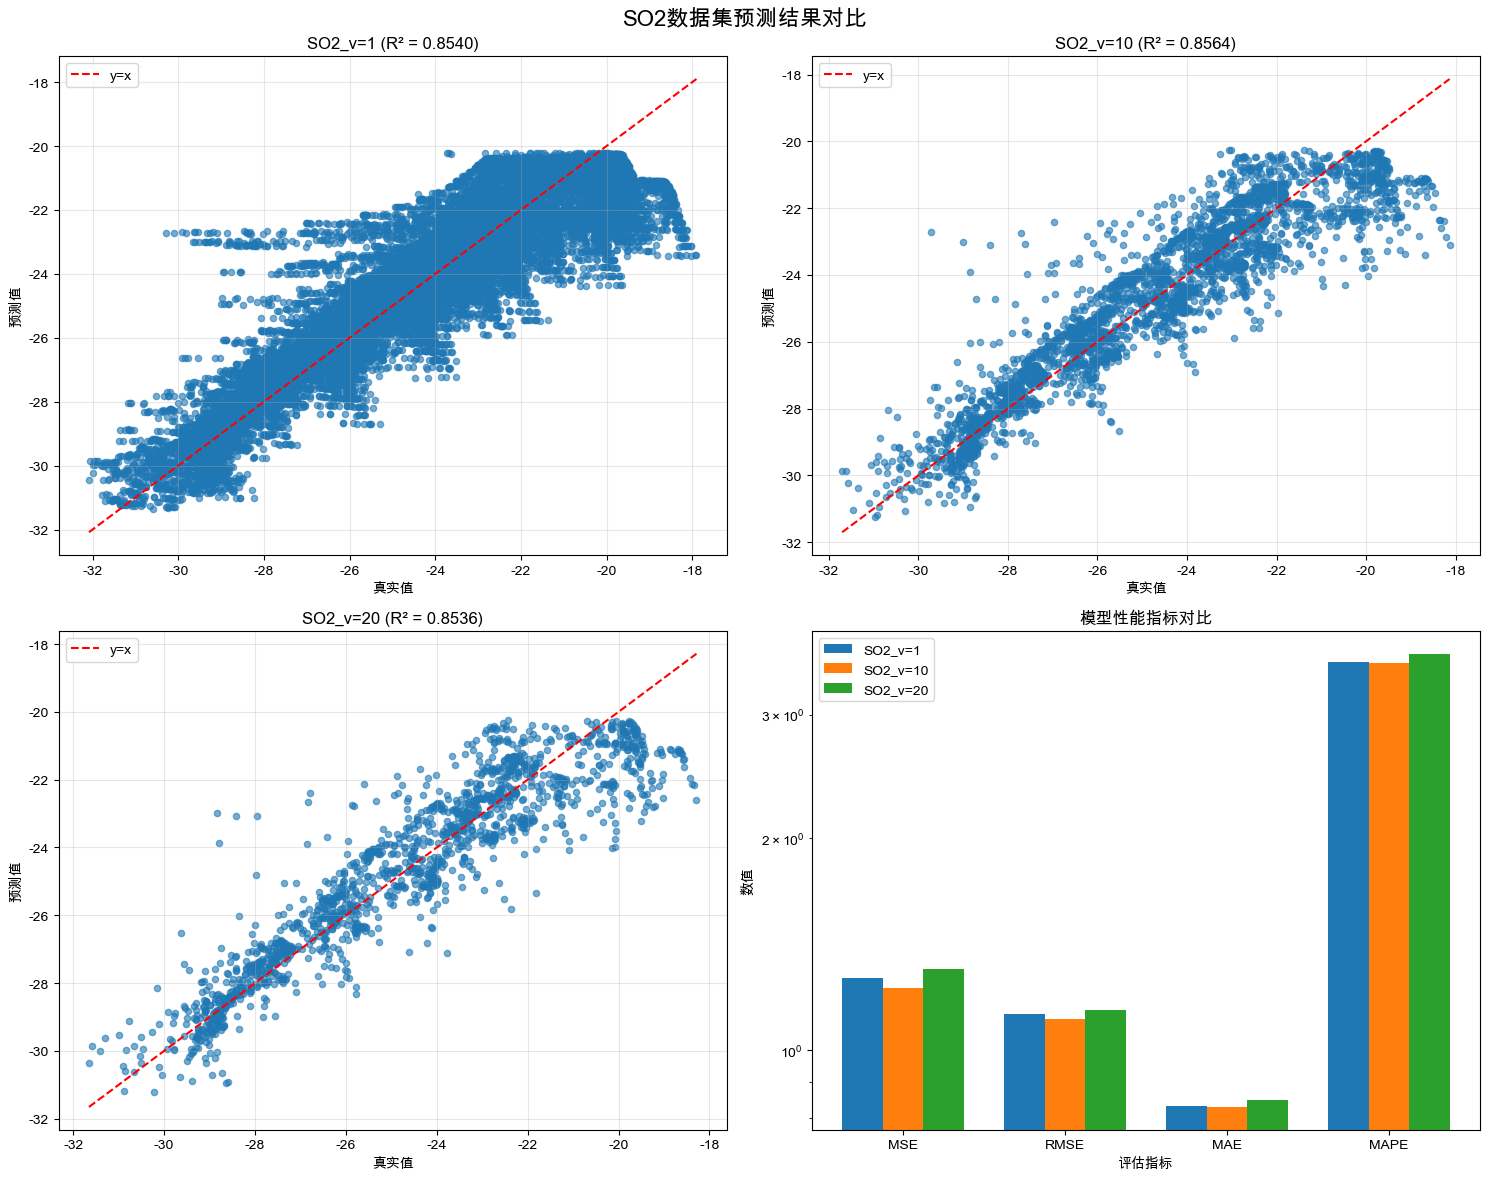

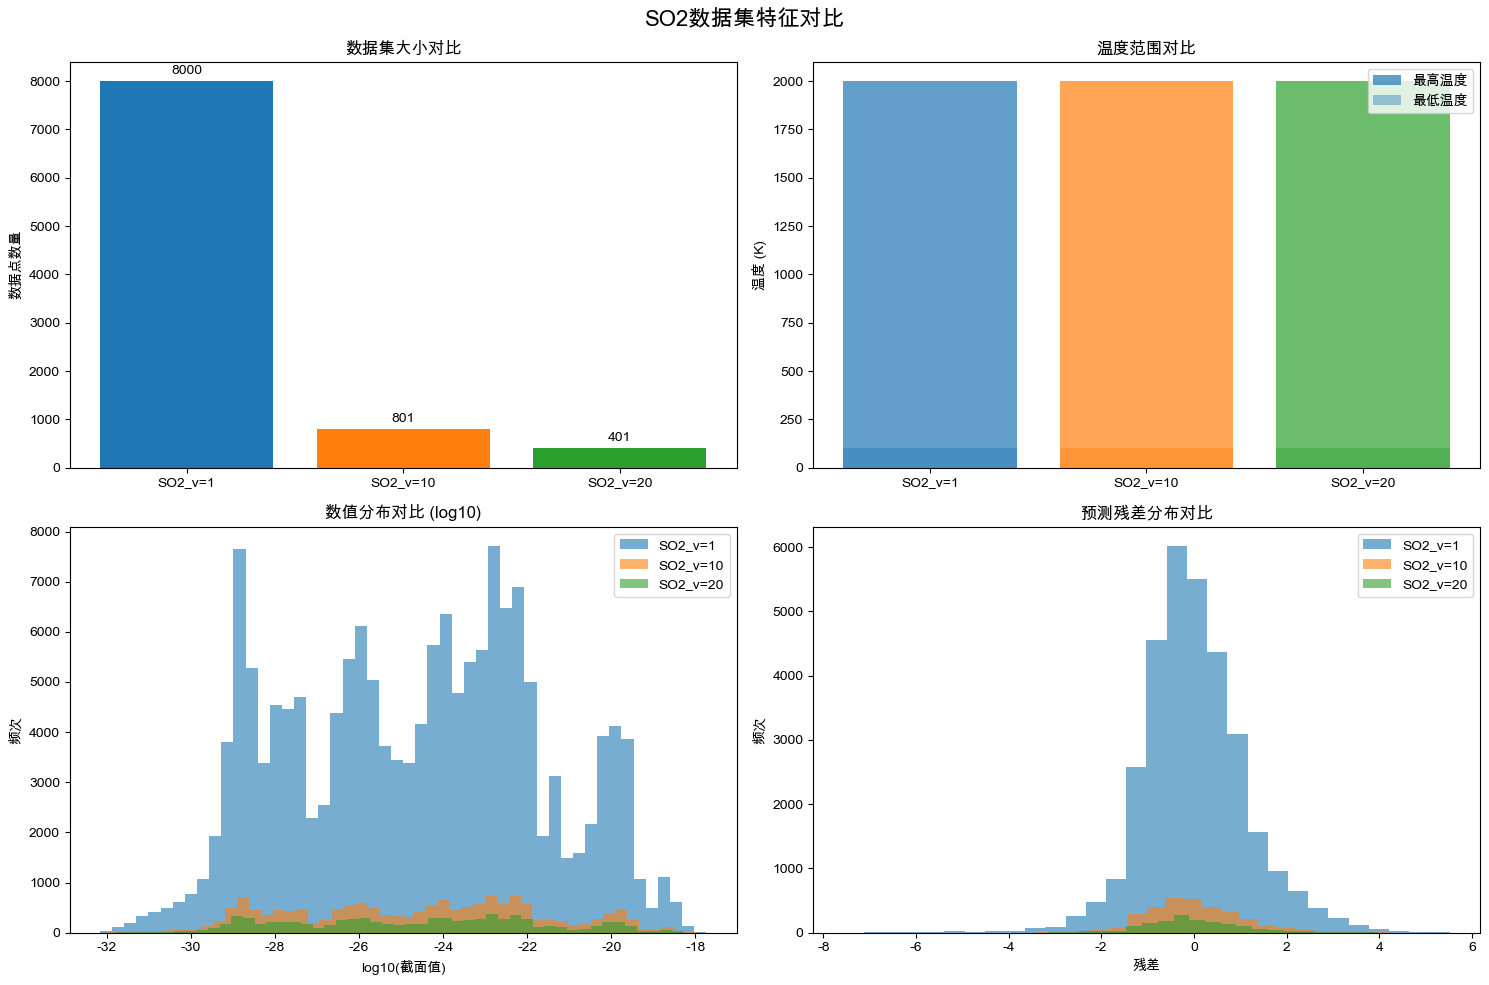


保存结果
  ✓ 保存Excel结果文件: so2_comparison_results.xlsx

分析完成！
生成的文件:
  - so2_comparison_results.png: 预测结果对比图
  - so2_dataset_comparison.png: 数据集特征对比图
  - so2_comparison_results.xlsx: 详细结果Excel文件

建议:
  - 最佳模型: SO2_v=10 (R² = 0.8564)
  - 查看生成的图表了解数据集差异
  - 检查Excel文件获取详细数值结果


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class SO2DataAnalyzer:
    def __init__(self):
        self.datasets = {}
        self.results = {}
        
    def load_data(self):
        """加载三个SO2数据集"""
        print("加载数据集...")
        
        file_paths = {
            'SO2_v=1': 'so2_v=1.xlsm',
            'SO2_v=10': 'so2_v=10.xlsm', 
            'SO2_v=20': 'so2_v=20.xlsm'
        }
        
        for name, path in file_paths.items():
            try:
                df = pd.read_excel(path)
                self.datasets[name] = df
                print(f"  ✓ 成功加载 {name}: {df.shape[0]} 行, {df.shape[1]} 列")
            except FileNotFoundError:
                print(f"  ✗ 文件未找到: {path}")
                return False
            except Exception as e:
                print(f"  ✗ 加载 {path} 时出错: {str(e)}")
                return False
        
        return len(self.datasets) > 0
    
    def basic_info_comparison(self):
        """基本信息对比"""
        print("\n" + "="*60)
        print("数据集基本信息对比")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\n{name}:")
            print(f"  数据形状: {df.shape}")
            print(f"  列名: {list(df.columns)}")
            
            # 分析温度列
            temp_cols = [col for col in df.columns if col.startswith('t=')]
            if temp_cols:
                temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                print(f"  温度范围: {min(temps)}K - {max(temps)}K")
                print(f"  温度点数: {len(temps)}")
            
            # 数值统计
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                data_values = df[numeric_cols[1:]].values.flatten()
                data_values = data_values[~np.isnan(data_values)]
                if len(data_values) > 0:
                    print(f"  数值范围: {data_values.min():.2e} - {data_values.max():.2e}")
                    print(f"  平均值: {data_values.mean():.2e}")
                    print(f"  标准差: {data_values.std():.2e}")
    
    def preprocess_data(self):
        """数据预处理"""
        print("\n" + "="*60)
        print("数据预处理")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\n处理 {name}...")
            
            # 检查并处理缺失值
            missing_count = df.isnull().sum().sum()
            if missing_count > 0:
                print(f"  发现 {missing_count} 个缺失值，使用前向填充")
                df.fillna(method='ffill', inplace=True)
                df.fillna(method='bfill', inplace=True)
            
            # 检查无穷值
            inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
            if inf_count > 0:
                print(f"  发现 {inf_count} 个无穷值，替换为NaN后填充")
                df.replace([np.inf, -np.inf], np.nan, inplace=True)
                df.fillna(method='ffill', inplace=True)
                df.fillna(method='bfill', inplace=True)
            
            print(f"  ✓ 预处理完成")
    
    def train_models(self):
        """训练机器学习模型"""
        print("\n" + "="*60)
        print("机器学习模型训练")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\n训练 {name} 模型...")
            
            try:
                # 准备特征和目标
                wavenumber_col = df.columns[0]  # 第一列是波数
                temp_cols = [col for col in df.columns if col.startswith('t=')]
                
                if len(temp_cols) == 0:
                    print(f"  ✗ 未找到温度列")
                    continue
                
                # 创建特征矩阵
                features_list = []
                targets_list = []
                
                for _, row in df.iterrows():
                    wavenumber = row[wavenumber_col]
                    for temp_col in temp_cols:
                        temp = int(temp_col.replace('t=', '').replace('k', '').replace('K', ''))
                        cross_section = row[temp_col]
                        
                        if not np.isnan(cross_section) and cross_section > 0:
                            features_list.append([wavenumber, temp])
                            targets_list.append(np.log10(cross_section))
                
                if len(features_list) == 0:
                    print(f"  ✗ 没有有效的训练数据")
                    continue
                
                X = np.array(features_list)
                y = np.array(targets_list)
                
                print(f"  训练数据点数: {len(X)}")
                
                # 数据标准化
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                
                # 多项式特征
                poly = PolynomialFeatures(degree=2, include_bias=False)
                X_poly = poly.fit_transform(X_scaled)
                
                # 划分训练测试集
                X_train, X_test, y_train, y_test = train_test_split(
                    X_poly, y, test_size=0.2, random_state=42
                )
                
                # Lasso回归
                model = Lasso(alpha=0.01, max_iter=2000)
                model.fit(X_train, y_train)
                
                # 预测
                y_pred = model.predict(X_test)
                
                # 计算评估指标
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                # MAPE (Mean Absolute Percentage Error)
                mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                
                # GME (Geometric Mean Error)
                gme = np.exp(np.mean(np.abs(np.log(np.abs(y_test) + 1e-10) - np.log(np.abs(y_pred) + 1e-10))))
                
                # 保存结果
                self.results[name] = {
                    'model': model,
                    'scaler': scaler,
                    'poly': poly,
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'mape': mape,
                    'gme': gme
                }
                
                print(f"  ✓ 模型训练完成")
                print(f"    MSE: {mse:.4e}")
                print(f"    RMSE: {rmse:.4e}")
                print(f"    MAE: {mae:.4e}")
                print(f"    R²: {r2:.4f}")
                print(f"    MAPE: {mape:.2f}%")
                print(f"    GME: {gme:.4e}")
                
            except Exception as e:
                print(f"  ✗ 训练失败: {str(e)}")
    
    def create_visualizations(self):
        """创建可视化图表"""
        print("\n" + "="*60)
        print("生成可视化图表")
        print("="*60)
        
        # 1. 预测结果散点图对比
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('SO2数据集预测结果对比', fontsize=16, fontweight='bold')
        
        plot_idx = 0
        for name, result in self.results.items():
            if plot_idx < 3:
                row, col = plot_idx // 2, plot_idx % 2
                ax = axes[row, col]
                
                y_test = result['y_test']
                y_pred = result['y_pred']
                
                ax.scatter(y_test, y_pred, alpha=0.6, s=20)
                ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
                ax.set_xlabel('真实值')
                ax.set_ylabel('预测值')
                ax.set_title(f'{name} (R² = {result["r2"]:.4f})')
                ax.legend()
                ax.grid(True, alpha=0.3)
                plot_idx += 1
        
        # 性能指标对比
        if len(self.results) > 1:
            ax = axes[1, 1]
            metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']
            x_pos = np.arange(len(metrics))
            width = 0.25
            
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            for i, (name, result) in enumerate(self.results.items()):
                values = [result['mse'], result['rmse'], result['mae'], result['mape']]
                ax.bar(x_pos + i*width, values, width, label=name, color=colors[i % len(colors)])
            
            ax.set_xlabel('评估指标')
            ax.set_ylabel('数值')
            ax.set_title('模型性能指标对比')
            ax.set_xticks(x_pos + width)
            ax.set_xticklabels(metrics)
            ax.legend()
            ax.set_yscale('log')
        
        plt.tight_layout()
        plt.savefig('so2_comparison_results.png', dpi=300, bbox_inches='tight')
        print("  ✓ 保存预测结果对比图: so2_comparison_results.png")
        
        # 2. 数据集规模和分布对比
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('SO2数据集特征对比', fontsize=16, fontweight='bold')
        
        # 数据集大小对比
        ax1 = axes[0, 0]
        names = list(self.datasets.keys())
        sizes = [df.shape[0] for df in self.datasets.values()]
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        bars = ax1.bar(names, sizes, color=colors)
        ax1.set_title('数据集大小对比')
        ax1.set_ylabel('数据点数量')
        for bar, size in zip(bars, sizes):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sizes)*0.01, 
                    str(size), ha='center', va='bottom')
        
        # 温度范围对比
        ax2 = axes[0, 1]
        temp_ranges = []
        for name, df in self.datasets.items():
            temp_cols = [col for col in df.columns if col.startswith('t=')]
            if temp_cols:
                temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                temp_ranges.append((min(temps), max(temps)))
            else:
                temp_ranges.append((0, 0))
        
        x_pos = np.arange(len(names))
        min_temps = [r[0] for r in temp_ranges]
        max_temps = [r[1] for r in temp_ranges]
        
        ax2.bar(x_pos, max_temps, color=colors, alpha=0.7, label='最高温度')
        ax2.bar(x_pos, min_temps, color=colors, alpha=0.4, label='最低温度')
        ax2.set_title('温度范围对比')
        ax2.set_ylabel('温度 (K)')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(names)
        ax2.legend()
        
        # 数值分布对比
        ax3 = axes[1, 0]
        for i, (name, df) in enumerate(self.datasets.items()):
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                data_values = df[numeric_cols[1:]].values.flatten()
                data_values = data_values[~np.isnan(data_values)]
                if len(data_values) > 0:
                    ax3.hist(np.log10(data_values + 1e-50), bins=50, alpha=0.6, 
                            label=name, color=colors[i])
        ax3.set_title('数值分布对比 (log10)')
        ax3.set_xlabel('log10(截面值)')
        ax3.set_ylabel('频次')
        ax3.legend()
        
        # 残差分布对比
        ax4 = axes[1, 1]
        for i, (name, result) in enumerate(self.results.items()):
            residuals = result['y_test'] - result['y_pred']
            ax4.hist(residuals, bins=30, alpha=0.6, label=name, color=colors[i])
        ax4.set_title('预测残差分布对比')
        ax4.set_xlabel('残差')
        ax4.set_ylabel('频次')
        ax4.legend()
        
        plt.tight_layout()
        plt.savefig('so2_dataset_comparison.png', dpi=300, bbox_inches='tight')
        print("  ✓ 保存数据集特征对比图: so2_dataset_comparison.png")
        
        plt.show()
    
    def save_results_to_excel(self):
        """保存结果到Excel文件"""
        print("\n" + "="*60)
        print("保存结果")
        print("="*60)
        
        with pd.ExcelWriter('so2_comparison_results.xlsx', engine='openpyxl') as writer:
            # 基本信息汇总
            summary_data = []
            for name, df in self.datasets.items():
                temp_cols = [col for col in df.columns if col.startswith('t=')]
                temps = []
                if temp_cols:
                    temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                
                numeric_cols = df.select_dtypes(include=[np.number]).columns
                data_values = df[numeric_cols[1:]].values.flatten() if len(numeric_cols) > 1 else []
                data_values = data_values[~np.isnan(data_values)] if len(data_values) > 0 else []
                
                summary_data.append({
                    '数据集': name,
                    '数据点数': df.shape[0],
                    '特征数': df.shape[1],
                    '最低温度(K)': min(temps) if temps else 'N/A',
                    '最高温度(K)': max(temps) if temps else 'N/A',
                    '最小值': f"{data_values.min():.2e}" if len(data_values) > 0 else 'N/A',
                    '最大值': f"{data_values.max():.2e}" if len(data_values) > 0 else 'N/A',
                    '平均值': f"{data_values.mean():.2e}" if len(data_values) > 0 else 'N/A'
                })
            
            summary_df = pd.DataFrame(summary_data)
            summary_df.to_excel(writer, sheet_name='数据集概览', index=False)
            
            # 模型性能对比
            if self.results:
                performance_data = []
                for name, result in self.results.items():
                    performance_data.append({
                        '数据集': name,
                        'MSE': f"{result['mse']:.4e}",
                        'RMSE': f"{result['rmse']:.4e}",
                        'MAE': f"{result['mae']:.4e}",
                        'R²': f"{result['r2']:.4f}",
                        'MAPE(%)': f"{result['mape']:.2f}",
                        'GME': f"{result['gme']:.4e}"
                    })
                
                performance_df = pd.DataFrame(performance_data)
                performance_df.to_excel(writer, sheet_name='模型性能对比', index=False)
            
            # 保存原始数据
            for name, df in self.datasets.items():
                sheet_name = f'原始数据_{name.replace("=", "_")}'
                df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        print("  ✓ 保存Excel结果文件: so2_comparison_results.xlsx")
    
    def run_complete_analysis(self):
        """运行完整的对比分析"""
        print("开始SO2数据集对比分析...")
        print("="*60)
        
        if not self.load_data():
            return
        
        self.basic_info_comparison()
        self.preprocess_data()
        self.train_models()
        self.create_visualizations()
        self.save_results_to_excel()
        
        print("\n" + "="*60)
        print("分析完成！")
        print("="*60)
        print("生成的文件:")
        print("  - so2_comparison_results.png: 预测结果对比图")
        print("  - so2_dataset_comparison.png: 数据集特征对比图")
        print("  - so2_comparison_results.xlsx: 详细结果Excel文件")
        print("\n建议:")
        if self.results:
            best_model = max(self.results.items(), key=lambda x: x[1]['r2'])
            print(f"  - 最佳模型: {best_model[0]} (R² = {best_model[1]['r2']:.4f})")
        print("  - 查看生成的图表了解数据集差异")
        print("  - 检查Excel文件获取详细数值结果")

if __name__ == "__main__":
    analyzer = SO2DataAnalyzer()
    analyzer.run_complete_analysis()

📥 Loading datasets...
  ✓ Loaded SO2_v=1: (8000, 21)
  ✓ Loaded SO2_v=10: (801, 21)
  ✓ Loaded SO2_v=20: (401, 21)

🚀 Training models...

SO2_v=1:
  ✓ MSE: 0.1341, RMSE: 0.3662, MAE: 0.2285, R²: 0.9845, MAPE: 0.91%, GME: 1.0092

SO2_v=10:
  ✓ MSE: 1.1956, RMSE: 1.0935, MAE: 0.8347, R²: 0.8597, MAPE: 3.57%, GME: 1.0361

SO2_v=20:
  ✓ MSE: 1.2869, RMSE: 1.1344, MAE: 0.8384, R²: 0.8555, MAPE: 3.65%, GME: 1.0366

📊 Plotting prediction results...


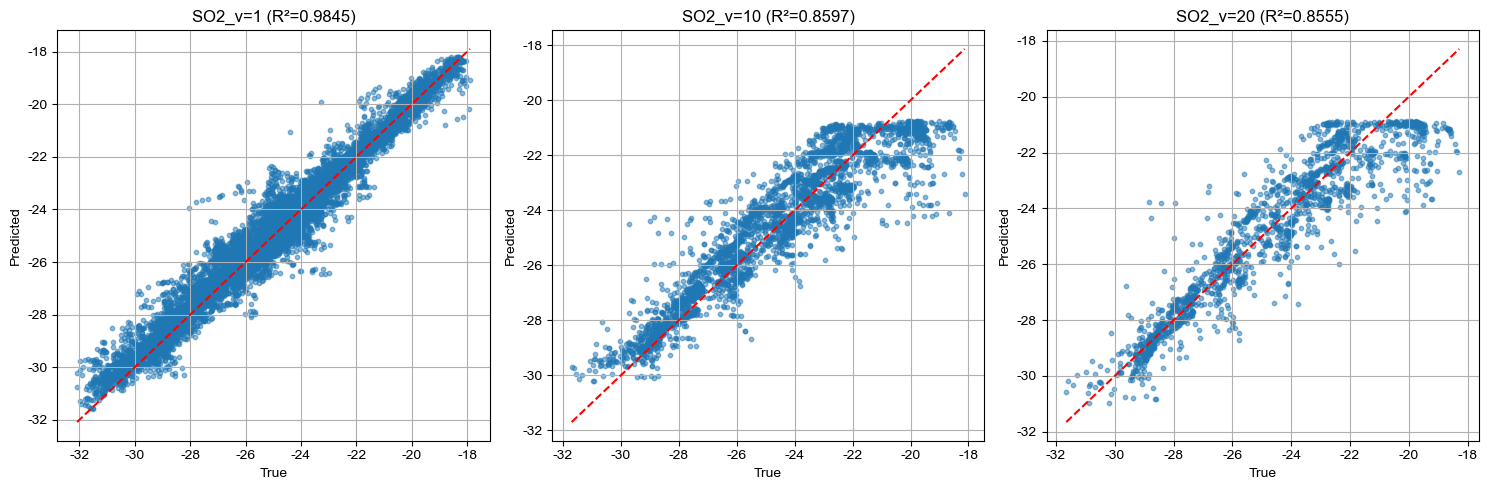

  ✓ Saved: so2_model_predictions.png


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 🔧 工具函数：构建带有多项式和标准化的 pipeline
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# 🌟 主类
class SO2DataAnalyzer:
    def __init__(self):
        self.datasets = {}
        self.results = {}

    def load_data(self):
        print("📥 Loading datasets...")
        file_paths = {
            'SO2_v=1': 'so2_v=1.xlsm',
            'SO2_v=10': 'so2_v=10.xlsm', 
            'SO2_v=20': 'so2_v=20.xlsm'
        }
        for name, path in file_paths.items():
            try:
                df = pd.read_excel(path)
                self.datasets[name] = df
                print(f"  ✓ Loaded {name}: {df.shape}")
            except Exception as e:
                print(f"  ✗ Failed to load {name}: {e}")
                return False
        return True

    def preprocess_data(self):
        for name, df in self.datasets.items():
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            df.fillna(method='ffill', inplace=True)
            df.fillna(method='bfill', inplace=True)
            self.datasets[name] = df

    def train_models(self):
        print("\n🚀 Training models...")
        for name, df in self.datasets.items():
            print(f"\n{name}:")

            try:
                wavenumber_col = df.columns[0]
                temp_cols = [col for col in df.columns if col.startswith('t=')]

                X, y = [], []
                for _, row in df.iterrows():
                    wavenumber = row[wavenumber_col]
                    for temp_col in temp_cols:
                        temp = int(temp_col.replace('t=', '').replace('k', ''))
                        value = row[temp_col]
                        if not np.isnan(value) and value > 0:
                            X.append([wavenumber, temp])
                            y.append(np.log10(value))

                X = np.array(X)
                y = np.array(y)

                if len(X) == 0:
                    print("  ✗ No valid data")
                    continue

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                model = make_poly_mlp(
                    MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000, random_state=1),
                    degree=2
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                gme = np.exp(np.mean(np.abs(np.log(np.abs(y_test + 1e-10)) - np.log(np.abs(y_pred + 1e-10)))))

                self.results[name] = {
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'mape': mape,
                    'gme': gme
                }

                print(f"  ✓ MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, MAPE: {mape:.2f}%, GME: {gme:.4f}")

            except Exception as e:
                print(f"  ✗ Error during training: {e}")

    def plot_results(self):
        print("\n📊 Plotting prediction results...")
        plt.figure(figsize=(15, 5))
        for i, (name, result) in enumerate(self.results.items()):
            plt.subplot(1, 3, i + 1)
            plt.scatter(result['y_test'], result['y_pred'], alpha=0.5, s=10)
            plt.plot([min(result['y_test']), max(result['y_test'])],
                     [min(result['y_test']), max(result['y_test'])], 'r--')
            plt.xlabel('True')
            plt.ylabel('Predicted')
            plt.title(f'{name} (R²={result["r2"]:.4f})')
            plt.grid(True)
        plt.tight_layout()
        plt.savefig("so2_model_predictions.png", dpi=300)
        plt.show()
        print("  ✓ Saved: so2_model_predictions.png")

    def run(self):
        if not self.load_data():
            print("❌ Cannot proceed without data.")
            return
        self.preprocess_data()
        self.train_models()
        self.plot_results()

if __name__ == "__main__":
    analyzer = SO2DataAnalyzer()
    analyzer.run()
